<a href="https://colab.research.google.com/github/basilkjoseph/Final_Year_Project/blob/main/Midsem_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/anantgupta129/Solar-Power-Generation-Forecasting/main/solarpowergeneration.csv')
df

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060


In [3]:
features = df[['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd', 'wind_speed_80_m_above_gnd', 'shortwave_radiation_backwards_sfc','generated_power_kw']][:-1]
target = df['generated_power_kw'][1:].values.reshape(-1, 1)

In [4]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [6]:
model1 = Sequential()
model1.add(InputLayer((1, 5)))
model1.add(LSTM(256, return_sequences=True))
model1.add(Dropout(0.3))
model1.add(LSTM(128, return_sequences=False))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='linear'))

In [7]:
cp1=ModelCheckpoint('model1.keras',save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [8]:
model1.fit(X_train, y_train, epochs=50, callbacks=[cp1], validation_split=0.2)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.2042 - root_mean_squared_error: 0.4513 - val_loss: 0.0919 - val_root_mean_squared_error: 0.3032
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0804 - root_mean_squared_error: 0.2834 - val_loss: 0.0649 - val_root_mean_squared_error: 0.2547
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0600 - root_mean_squared_error: 0.2449 - val_loss: 0.0464 - val_root_mean_squared_error: 0.2153
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0423 - root_mean_squared_error: 0.2057 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1676
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0282 - root_mean_squared_error: 0.1678 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1461
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0234 - root_mean_squared_error: 0.1529 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1426
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss:

In [9]:
from tensorflow.keras.models import load_model
model1=load_model('model1.keras')

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


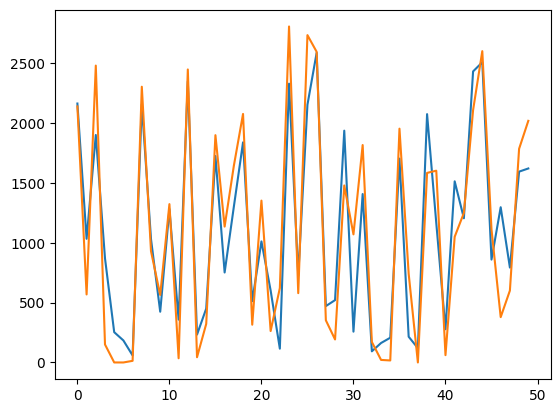

In [10]:
import matplotlib.pyplot as plt
predictions = model1.predict(X_test)
predictions_rescaled = target_scaler.inverse_transform(predictions)
y_test_rescaled = target_scaler.inverse_transform(y_test)
y_test_rescaled = y_test_rescaled.flatten()
test_predictions=predictions_rescaled.flatten()
test_results=pd.DataFrame(data={'Test Predictions':test_predictions,'Actuals':y_test_rescaled})
plt.plot(test_results['Test Predictions'][:50])
plt.plot(test_results['Actuals'][:50])
plt.show()

In [12]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse1 = np.sqrt(mean_squared_error(test_results['Test Predictions'], test_results['Actuals']))
Maximum=(test_results['Actuals']).max()
Mean=(test_results['Actuals']).mean()
accuracy1=100-(rmse1/Maximum)*100
accuracy2=100-(rmse1/Mean)*100
print(f"LSTM ACCURACY wrt Maximum: {accuracy1}")
print(f"LSTM ACCURACY wrt Mean: {accuracy2}")

LSTM ACCURACY wrt Maximum: 86.83777825544634
LSTM ACCURACY wrt Mean: 64.22489601590206


In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

mae1 = mean_absolute_error(test_results['Actuals'],test_results['Test Predictions'])
mse1 = mean_squared_error(test_results['Actuals'],test_results['Test Predictions'])
rmse1 = mse1 ** 0.5
mape1 = mean_absolute_percentage_error(test_results['Actuals'],test_results['Test Predictions'])
r21 = r2_score(test_results['Actuals'],test_results['Test Predictions'])

In [15]:
print("Mean Absolute Error = ", mae1)
print("Mean Squared Error = ", mse1)
print("Root Mean Squared Error =", rmse1)
print("Mean Absolute Percentage Error =", mape1)
print("r2 Score =", r21)

Mean Absolute Error =  281.2478960002073
Mean Squared Error =  159786.22043977724
Root Mean Squared Error = 399.7326862289063
Mean Absolute Percentage Error = 414.8155039019481
r2 Score = 0.8236883022114292


In [ ]:
model2 = Sequential()
model2.add(InputLayer((1, 5)))
model2.add(GRU(256, return_sequences=True))  # Increase units for more complexity
model2.add(Dropout(0.3))
model2.add(GRU(128, return_sequences=False))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='linear'))

In [ ]:
cp2=ModelCheckpoint('model2.keras',save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X_train, y_train, epochs=50, callbacks=[cp2], validation_split=0.2)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1922 - root_mean_squared_error: 0.4363 - val_loss: 0.0689 - val_root_mean_squared_error: 0.2625
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0619 - root_mean_squared_error: 0.2486 - val_loss: 0.0387 - val_root_mean_squared_error: 0.1968
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0364 - root_mean_squared_error: 0.1907 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1521
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0252 - root_mean_squared_error: 0.1586 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1438
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0222 - root_mean_squared_error: 0.1488 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1410
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0210 - root_mean_squared_error: 0.1449 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1392
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss:

In [ ]:
model2=load_model('model2.keras')

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


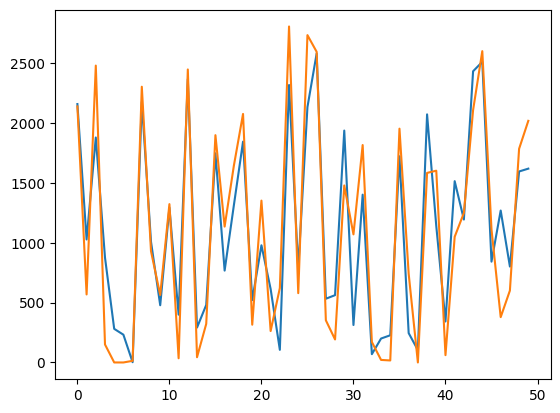

In [ ]:
predictions2 = model2.predict(X_test)
predictions_rescaled2 = target_scaler.inverse_transform(predictions2)
y_test_rescaled2 = target_scaler.inverse_transform(y_test)
y_test_rescaled2 = y_test_rescaled2.flatten()
test_predictions2=predictions_rescaled2.flatten()
test_results2=pd.DataFrame(data={'Test Predictions':test_predictions2,'Actuals':y_test_rescaled2})
import matplotlib.pyplot as plt
plt.plot(test_results2['Test Predictions'][:50])
plt.plot(test_results2['Actuals'][:50])
plt.show()

In [ ]:
model3 = Sequential()
model3.add(InputLayer((1, 5)))  # (timesteps, features)
model3.add(Conv1D(64, kernel_size=1, activation='relu'))
model3.add(MaxPooling1D(pool_size=1))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(1, activation='linear'))

In [ ]:
cp3=ModelCheckpoint('model3.keras',save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X_train, y_train, epochs=50, callbacks=[cp3], validation_split=0.2)
model3=load_model('model3.keras')

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1403 - root_mean_squared_error: 0.3735 - val_loss: 0.0743 - val_root_mean_squared_error: 0.2726
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0679 - root_mean_squared_error: 0.2604 - val_loss: 0.0453 - val_root_mean_squared_error: 0.2129
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0407 - root_mean_squared_error: 0.2017 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1660
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0277 - root_mean_squared_error: 0.1664 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1479
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0231 - root_mean_squared_error: 0.1519 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1432
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0222 - root_mean_squared_error: 0.1487 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1400
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0211

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


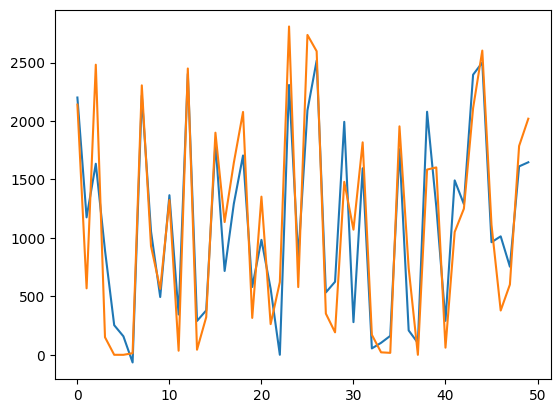

In [ ]:
predictions3 = model3.predict(X_test)
predictions_rescaled3 = target_scaler.inverse_transform(predictions3)
y_test_rescaled3 = target_scaler.inverse_transform(y_test)
y_test_rescaled3 = y_test_rescaled3.flatten()
test_predictions3=predictions_rescaled3.flatten()
test_results3=pd.DataFrame(data={'Test Predictions':test_predictions3,'Actuals':y_test_rescaled3})
import matplotlib.pyplot as plt
plt.plot(test_results3['Test Predictions'][:50])
plt.plot(test_results3['Actuals'][:50])
plt.show()

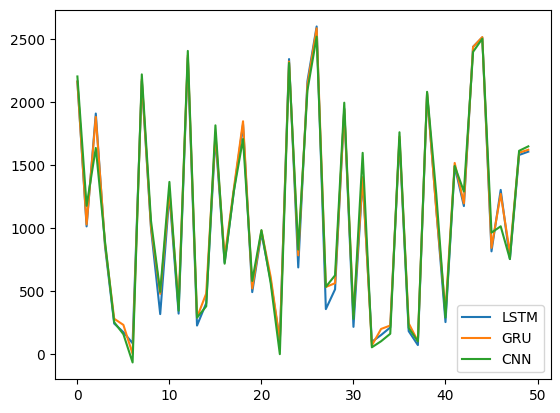

In [ ]:
test_results = pd.DataFrame(data={'CNN':test_predictions3,'GRU':test_predictions2, 'LSTM':test_predictions, 'Actuals':y_test_rescaled})
plt.plot(test_results['Actuals'][:50], label="Actual")
plt.plot(test_results['LSTM'][:50], label="LSTM")
plt.plot(test_results['GRU'][:50], label="GRU")
plt.plot(test_results['CNN'][:50], label="CNN")
plt.legend()